In [1]:
import os
from ultralytics import YOLO

In [ ]:
test = "./test_images"

In [2]:
model = YOLO("./runs/segment/train15/weights/best.pt")

/home/p.kuznetsov/runaway/venv/lib/python3.9/site-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='c

In [ ]:
images = []
for subdirectory in os.listdir(test):
    sub_path = os.path.join(test, subdirectory)
    for date in os.listdir(sub_path):
        date_path = os.path.join(sub_path, date)
        for file in os.listdir(date_path):
            if file.endswith(".png"):
                file_path = os.path.join(date_path, file)
                images.append(file_path)

In [ ]:
results = model(images, imgsz=640)

In [ ]:
from PIL import Image
from IPython.display import display

for i, r in enumerate(results):
    if r.boxes.conf.tolist() == [] or r.boxes[0].conf < 0.5:
        continue
    # Plot results image
    im_bgr = r.plot()  # BGR-order numpy array
    im_rgb = Image.fromarray(im_bgr[..., ::-1])  # RGB-order PIL image

    display(im_rgb)

In [4]:
result = model("./test.png", imgsz=640)


image 1/1 /home/p.kuznetsov/runaway/test.png: 608x640 2 roads-hicjs, 33.2ms
Speed: 2.7ms preprocess, 33.2ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 640)


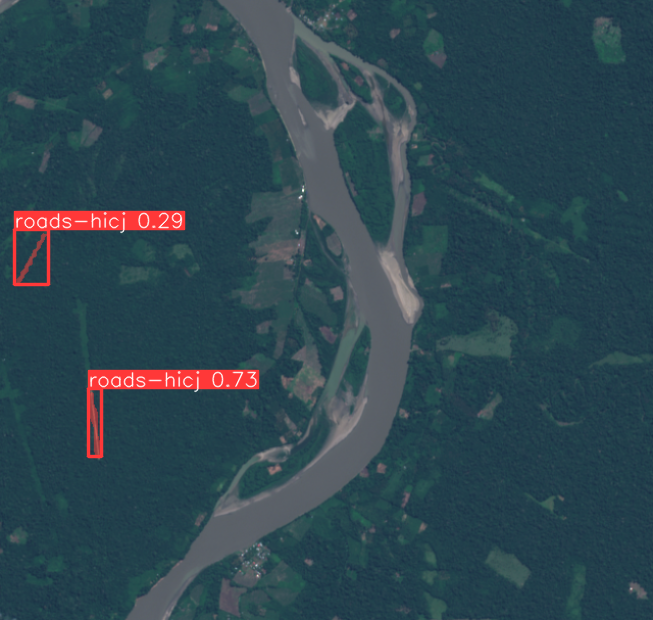

In [5]:
from PIL import Image
from IPython.display import display

for i, r in enumerate(result):
    # Plot results image
    im_bgr = r.plot()  # BGR-order numpy array
    im_rgb = Image.fromarray(im_bgr[..., ::-1])  # RGB-order PIL image

    display(im_rgb)